# Problem Identification
This problem is about the direct phone call marketing campaigns, which aim to promote term deposits among existing customers, by a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

### Link to the Dataset at UCI Repository
https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

# Getting the relavent Data
The data is available at UCI Repository.

### Extract Data

In [2]:
import numpy as np
import pandas as pd

In [3]:
bank_data = pd.read_csv("https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/bank-full.csv", sep=";")

# Data Analysis

In [13]:
bank_data.isnull().any(axis = 1)

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
45181    False
45182    False
45183    False
45184    False
45185    False
45186    False
45187    False
45188    False
45189    False
45190    False
45191    False
45192    False
45193    False
45194    False
45195    False
45196    False
45197    False
45198    False
45199    False
45200    False
45201    False
45202    False
45203    False
45204    False
45205    False
45206    False
45207    False
45208    False
45209    False
45210    False
Length: 45211, dtype: bool

In [92]:
# A look at the sample data
bank_data.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
36047,41,blue-collar,married,secondary,no,-217,yes,no,cellular,11,may,313,1,349,3,other,no
38337,28,blue-collar,married,secondary,no,83,yes,no,cellular,15,may,224,1,-1,0,unknown,no
30925,34,admin.,married,secondary,no,764,no,no,cellular,9,feb,89,2,-1,0,unknown,no
32800,34,management,married,tertiary,no,520,yes,no,cellular,17,apr,401,1,248,4,success,no
41367,22,services,single,secondary,no,652,no,no,telephone,31,aug,139,1,-1,0,unknown,no
43525,76,retired,divorced,primary,no,2693,no,no,cellular,23,apr,109,5,184,2,success,no
34951,29,technician,single,tertiary,no,2203,yes,no,cellular,6,may,1131,2,-1,0,unknown,no
43711,37,management,married,tertiary,no,393,yes,no,cellular,14,may,567,3,275,4,failure,yes
2490,46,blue-collar,single,primary,no,355,yes,no,unknown,13,may,320,1,-1,0,unknown,no
26247,31,blue-collar,single,primary,no,5972,no,no,telephone,20,nov,59,1,-1,0,unknown,no


In [93]:
# Checking the info
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


* 45211 observations with 17 columns.
* No missing values in the data set. But 'unknown' entries in some of the columns can be considered as missing values.
* Dataset includes both numerical and categorical column.

In [94]:
# Check the descriptive measures of data
bank_data.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


* **age** variable seem to be symmetrically distributed. Mean and median values are nearly equal.
* **balance** and **duration** variable seem to be asymmetrically distributed. Large difference between mean and median values. This variable contains some outliers. 

In [95]:
# identifying categorical columns and numerical columns
cat_col = bank_data.select_dtypes(include = 'object').columns
num_col = bank_data.select_dtypes(exclude = 'object').columns

In [96]:
print(cat_col)
print(num_col)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


In [97]:
# One way frequency table for all categorical features
for col in cat_col:
    print('*' * 5, 'Value percentage: ', col, '*' * 5)
    print(bank_data[col].value_counts()/len(bank_data)*100,"\n")

***** Value percentage:  job *****
blue-collar      21.525735
management       20.919688
technician       16.803433
admin.           11.437482
services          9.188029
retired           5.007631
self-employed     3.492513
entrepreneur      3.289023
unemployed        2.882042
housemaid         2.742695
student           2.074716
unknown           0.637013
Name: job, dtype: float64 

***** Value percentage:  marital *****
married     60.193316
single      28.289576
divorced    11.517109
Name: marital, dtype: float64 

***** Value percentage:  education *****
secondary    51.319369
tertiary     29.419831
primary      15.153392
unknown       4.107407
Name: education, dtype: float64 

***** Value percentage:  default *****
no     98.197341
yes     1.802659
Name: default, dtype: float64 

***** Value percentage:  housing *****
yes    55.583818
no     44.416182
Name: housing, dtype: float64 

***** Value percentage:  loan *****
no     83.977351
yes    16.022649
Name: loan, dtype: float64 



* Only 11% of the clients subscribed the term deposits.
* 5% of the observations are with poutcome as 'other' and in addition to this there are 81% observations with 'poutcome' as unknown. So we will drop the records which have 'poutcome' as other. These can be considered as missing data and treat 'unknown' as of other category.
* There were very few success in the previous marketing campaign.
* Maximum clients were contacted on cellular phone. We can say that maximum clients were carrying cellular phone.
* Very few peole arount 16% had taken personal loans.
* 55% had housing loan.
* only 1.8% of the clients had credit in default.
* 51% had secondary education
* 60% were married.
* Maximum clients had reputed jobs with them.

##### Understandings
* Subscription of the product has nothing to do with the mode of contact and marital status.

In [98]:
# Numerical data
bank_data[num_col].sample(10)

,age,balance,day,duration,campaign,pdays,previous
33536,41,285,20,1272,2,-1,0
27287,35,391,21,152,1,-1,0
42731,74,935,26,100,1,104,1
4394,32,228,20,257,1,-1,0
44,58,96,5,616,1,-1,0
15250,29,3220,17,172,3,-1,0
17892,45,13265,30,113,2,-1,0
5054,32,5252,21,1162,2,-1,0
15366,33,89,18,278,2,-1,0
9194,40,1038,5,741,1,-1,0


* Some clients have negative balance in bank account. This indicates that those clients have current account and current accounts are popular among companies, firms, public enterprises, businessmen who generally have higher number of regular transactions with the bank.

In [99]:
# Looking at 3 variables; campaign, pdays and previous
bank_data[['campaign','pdays','previous']].sample(20)

,campaign,pdays,previous
15432,1,-1,0
41564,3,-1,0
24907,1,-1,0
3005,1,-1,0
32973,2,263,2
34720,8,351,11
5813,1,-1,0
21773,3,-1,0
39990,2,96,5
33700,3,-1,0


* pdays is number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted). **But there are some entries as -1 whenever the entry is 0 for 'previous' (i.e. number of contacts performed before this campaign and for this client).**

In [100]:
# checking the skewness of numerical variables
bank_data[num_col].skew()

age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

In [101]:
bank_data[num_col].previous.value_counts()/len(bank_data)*100

0      81.736745
1       6.131251
2       4.658158
3       2.525934
4       1.579262
5       1.015240
6       0.612683
7       0.453429
8       0.285329
9       0.203490
10      0.148194
11      0.143770
12      0.097321
13      0.084050
15      0.044237
14      0.042025
17      0.033178
16      0.028754
19      0.024330
23      0.017695
20      0.017695
22      0.013271
18      0.013271
24      0.011059
27      0.011059
29      0.008847
25      0.008847
21      0.008847
30      0.006636
28      0.004424
26      0.004424
37      0.004424
38      0.004424
55      0.002212
40      0.002212
35      0.002212
58      0.002212
51      0.002212
41      0.002212
32      0.002212
275     0.002212
Name: previous, dtype: float64

* 81% of the clients were not contacted before this campaign.

## Data Cleaning

In [102]:
# Drop the observations of which have poutcome as 'other'
bank_data.drop(bank_data[bank_data.poutcome == 'other'].index, axis = 0, inplace = True)

#### Removing outliers
We can remove balance and duration outliers using z-scores. Those observations which are out of 3 z-scores left and right can be removed.

In [103]:
from scipy.stats import zscore


bank_data['balance_outliers'] = bank_data['balance']
bank_data['balance_outliers']= zscore(bank_data['balance_outliers'])

condition = (bank_data['balance_outliers']>3) | (bank_data['balance_outliers']<-3 )
bank_data.drop(bank_data[condition].index, axis = 0, inplace = True)

In [104]:
bank_data['duration_outliers'] = bank_data['duration']
bank_data['duration_outliers']= zscore(bank_data['duration_outliers'])

condition = (bank_data['duration_outliers']>3) | (bank_data['duration_outliers']<-3 )
bank_data.drop(bank_data[condition].index, axis = 0, inplace = True)

In [105]:
bank_data.shape

(41753, 19)

* Some observations are removed earlier we had 45211 observations.

In [106]:
# Drop the balance_outliers and duration_outliers columns as its work is finished.
bank_data.drop(columns=['balance_outliers', 'duration_outliers'], axis = 1, inplace=True)

In [107]:
bank_data.shape

(41753, 17)

### Creating and Transforming data

In [108]:
# Change column name 'y' to 'subscribed'
bank_data.rename(columns={'y': 'subscribed'}, inplace = True)

# transform the entries in subscribed as no=>0 and yes=>1
def cat_to_num(r):
    if r == 'no':
        return 0
    else:
        return 1
    
bank_data['subscribed_binary'] = bank_data.subscribed.apply(cat_to_num)

bank_data.subscribed_binary.value_counts()

0    37427
1     4326
Name: subscribed_binary, dtype: int64

In [109]:
# droping the contact and marital column
bank_data.drop(columns=['contact','marital'], axis = 1, inplace = True)

In [110]:
# duration is given in seconds, change this in minutes
bank_data['duration'] = bank_data['duration'].apply(lambda x : x / 60).round(2)

In [111]:
# We have month entries as month names, convert this month number as jan = 1, feb = 2, mar = 3, etc.
def month_converter(r):
    if r == 'jan':
        return 1
    elif r == 'feb':
        return 2
    elif r == 'mar':
        return 3
    elif r == 'apr': 
        return 4
    elif r == 'may':
        return 5
    elif r == 'jun':
        return 6
    elif r == 'jul':
        return 7
    elif r == 'aug':
        return 8
    elif r == 'sep':
        return 9
    elif r == 'oct':
        return 10
    elif r == 'nov':
        return 11
    else:
        return 12
    
# Conversion
bank_data['month_number'] = bank_data.month.apply(month_converter)

bank_data['month_number'].value_counts()

5     12794
7      6623
8      5940
6      5056
11     3519
4      2559
2      2304
1      1226
10      633
9       492
3       428
12      179
Name: month_number, dtype: int64

# Data Visualizations

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

##### Age

Text(0.5, 1.0, 'The distribution of Age of clients called by bank')

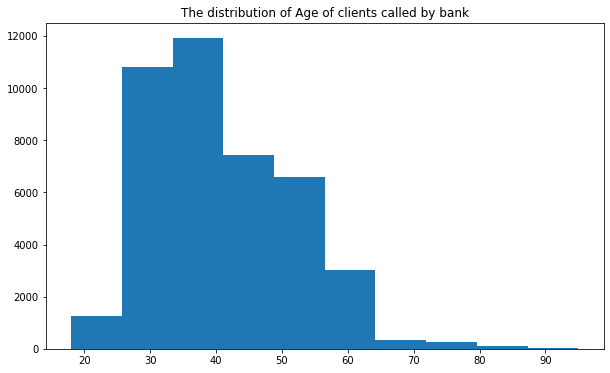

In [113]:
plt.figure(figsize=(10, 6))
plt.hist(bank_data.age)
plt.title('The distribution of Age of clients called by bank')

In [114]:
bank_data['age'].describe()

count    41753.000000
mean        40.938232
std         10.574621
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

* The distribution of client's ages seems to be fairly normal.
* Age of clients ranged from 18 to 95.
* Majority of clients called are between age 30 to 40.
* 33 years to 48 years old clients lies falls in 25th percentile to 75th percentile.
* Standard deviaiton is small here indicating less variability.

##### Balance

Text(0.5, 1.0, 'The distribution of account balance of clients')

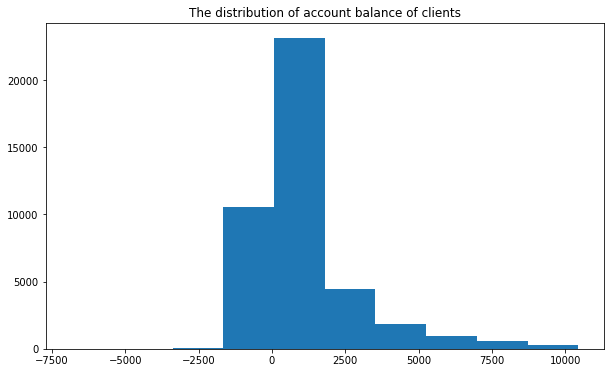

In [115]:
plt.figure(figsize=(10, 6))
plt.hist(bank_data.balance)
plt.title('The distribution of account balance of clients')

In [116]:
bank_data['balance'].describe()

count    41753.000000
mean      1075.461212
std       1715.805404
min      -6847.000000
25%         64.000000
50%        422.000000
75%       1335.000000
max      10443.000000
Name: balance, dtype: float64

* We have already dropped outliers from balance feature and yet the distribution seems to be not normal.
* The balance of different clients ranged from -6847 to 10443.
* Standard deviation is high indicating high variability in the data.

##### Relations between Age and Balance

Text(0.5, 1.0, 'The Relationship between Age and Balance')

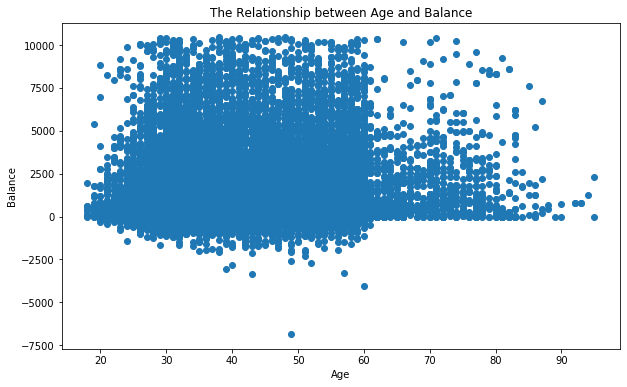

In [117]:
# Age and balance
plt.figure(figsize=(10, 6))
plt.scatter(bank_data.age, bank_data.balance)
plt.xlabel("Age")
plt.ylabel('Balance')
plt.title('The Relationship between Age and Balance')

* Based on the above scatter plot, there is not good correlation between age and balance variable.
* The graph also tells that clients above age 60 tend to have significantly lower balance. Most of the clients above age 60 have balances under 5000.

##### Duration and Campaign

duration       AxesSubplot(0.125,0.125;0.352273x0.755)
campaign    AxesSubplot(0.547727,0.125;0.352273x0.755)
dtype: object

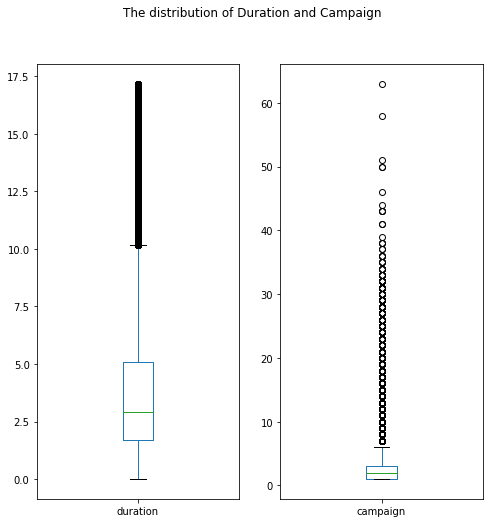

In [118]:
bank_data[['duration','campaign']].plot(kind = 'box', figsize=(8,8), subplots = True, layout = (1,2),
                                       title = 'The distribution of Duration and Campaign')

In [119]:
bank_data[['duration','campaign']].describe()

,duration,campaign
count,41753.000000,41753.000000
mean,3.897987,2.777190
std,3.179434,3.141922
min,0.000000,1.000000
25%,1.700000,1.000000
50%,2.930000,2.000000
75%,5.080000,3.000000
max,17.180000,63.000000


**Duration**
* The duration of contact has mean of 3.89 minutes and that median is 2.93 minutes.
* There are large amount of outliers ranging from 10 minutes to 17 minutes.

**Campaign**
* 50% of the clients are contacted by bank for the second time and 25% for the first time.
* 75% of the clients have been reached by the bank for 1 to 3 times.
* Some clients are also contacte by bank for 50 to 60 times which seems to be not normal.

##### Relationship between duration and campaign with the subscription taken by clients.


Text(0.5, 1.0, 'Relationship between Duration of calls and Number of calls')

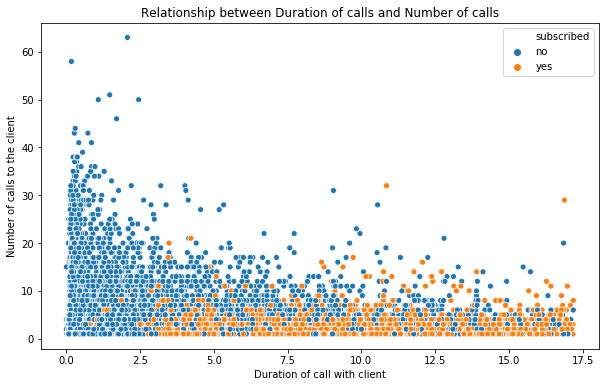

In [120]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = bank_data.duration, y = bank_data.campaign, hue=bank_data.subscribed)
plt.xlabel('Duration of call with client')
plt.ylabel('Number of calls to the client')
plt.title('Relationship between Duration of calls and Number of calls')

* **Blue points are those who did not subscribe the product and Orange points are those who subscribed the product.**

* There is higher subscription when the number of call is less than 5.
* Those who were contacted fewer times had long call duration.
* When a client is called more than 5 times he is more likely to reject the subscription unless the duration is high.
* Most subscription are taken by the client who were called less than 10 times.

* **Also, we can conclude that bank should not call a client more 5 times as it might be frustrating and will disapoint the client.**

##### Scatterplot for Age, balance, duration, and campaign

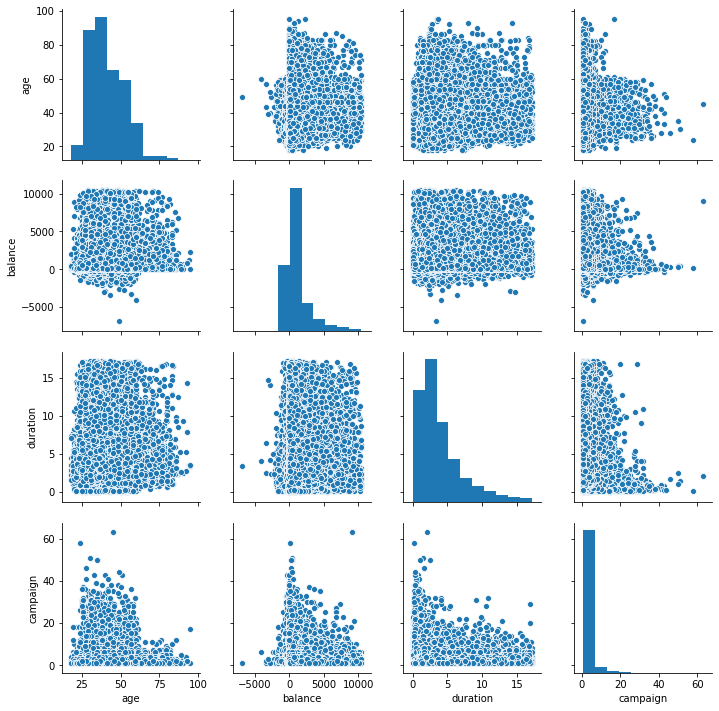

In [121]:
sns.pairplot(bank_data[['age','balance','duration','campaign']])

##### Visualize Subscription count by Job

[Text(0, 0, 'management'),
 Text(0, 0, 'technician'),
 Text(0, 0, 'entrepreneur'),
 Text(0, 0, 'blue-collar'),
 Text(0, 0, 'unknown'),
 Text(0, 0, 'retired'),
 Text(0, 0, 'admin.'),
 Text(0, 0, 'services'),
 Text(0, 0, 'self-employed'),
 Text(0, 0, 'unemployed'),
 Text(0, 0, 'housemaid'),
 Text(0, 0, 'student')]

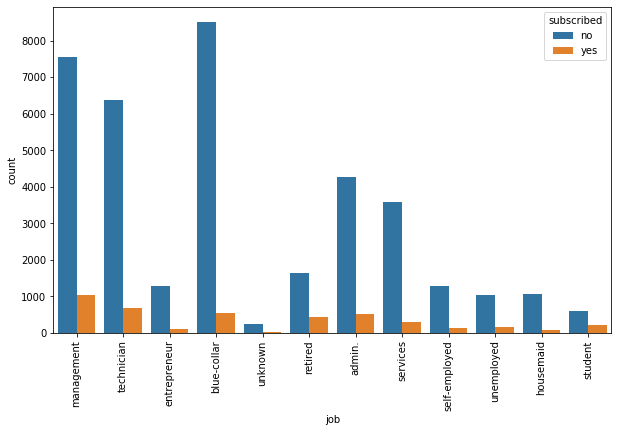

In [122]:
# Job and subscribed
plt.figure(figsize=(10,6))
plot = sns.countplot(bank_data.job, hue=bank_data.subscribed)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

In [123]:
bank_data.head()

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,subscribed,subscribed_binary,month_number
0,58,management,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no,0,5
1,44,technician,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no,0,5
2,33,entrepreneur,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,0,5
3,47,blue-collar,unknown,no,1506,yes,no,5,may,1.53,1,-1,0,unknown,no,0,5
4,33,unknown,unknown,no,1,no,no,5,may,3.30,1,-1,0,unknown,no,0,5


# Converting Categorical columns to dummy variables

In [125]:
# We have already converted month and subscription to numerical, so drop these categorical
bank_data.drop(columns=['month','subscribed'], axis = 1, inplace = True)

In [127]:
# Remaining categorical columns are 'job','education','default','housing','loan','poutcome'. Will convert to dummy variables
cat_col = ['job','education','default','housing','loan','poutcome']

In [129]:
data = pd.get_dummies(bank_data, columns=cat_col)

## Separate target and feature variables

In [133]:
feature = data.drop(columns=['subscribed_binary'])
target = data.subscribed_binary

## Split the data into train and test set

In [135]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(feature, target, test_size = 0.3, random_state = 42)

### Logistic Regression

In [137]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(train_X, train_Y)

c:\users\manishkc\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [138]:
log_model.score(train_X, train_Y)

0.9102200020528963

In [139]:
log_model.score(test_X, test_Y)

0.9070732875618713

### KNN

In [141]:
from sklearn.neighbors import KNeighborsClassifier

# Checking for different values of k
for k in range(1, 10):
    knn = KNeighborsClassifier(k)
    knn.fit(train_X, train_Y)
    print('for k = ',k)
    print('Train score is: ', round(knn.score(train_X, train_Y),2))
    print('Test Score is: ', round(knn.score(test_X, test_Y),2))

for k =  1
Train score is:  1.0
Test Score is:  0.87
for k =  2
Train score is:  0.92
Test Score is:  0.9
for k =  3
Train score is:  0.93
Test Score is:  0.89
for k =  4
Train score is:  0.91
Test Score is:  0.89
for k =  5
Train score is:  0.91
Test Score is:  0.89
for k =  6
Train score is:  0.91
Test Score is:  0.89
for k =  7
Train score is:  0.91
Test Score is:  0.89
for k =  8
Train score is:  0.9
Test Score is:  0.89
for k =  9
Train score is:  0.9
Test Score is:  0.89


* The best value of k seems to be 8 as this value for k, the train score and test score are good and have very little difference.

### Decision Tree

In [142]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(train_X, train_Y)
print(dtree.score(train_X, train_Y))
print(dtree.score(test_X, test_Y))

1.0
0.8798499121826601


# Conclusion
* The best model is Logistic Regression with 0.91 accuracy for train data and 0.90 accuracy for test data.